# Distribution of taxi trips per district of New York City

In [1]:
import setup

def district_distribution(df, location):
    bronx,brooklyn,manhatten,queens,staten_island = [],[],[],[],[]
    trips = df.loc[df['passenger_count'] > 0][location].value_counts()
    for key in trips.keys():
        if key in setup.bronx:
            bronx.append(trips[key])
        elif key in setup.brooklyn: 
            brooklyn.append(trips[key])
        elif key in setup.manhatten:
            manhatten.append(trips[key])
        elif key in setup.queens: 
            queens.append(trips[key])
        elif key in setup.staten_island:
            staten_island.append(trips[key])
    return [sum(bronx), sum(brooklyn), sum(manhatten), sum(queens), 
            sum(staten_island)] 

def sum_up(year):
    distribution = setup.np.array([0,0,0,0,0])
    for month in year:
        distribution += setup.np.array(month)
    return distribution

def district_percentages(array):
    percentages = []
    for item in array:
        percentages.append(item / sum(array)*100)
    return percentages

def show_result(percentages, year, figure_label):
    print('-------------------- YEAR AVERAGE --------------------')
    print(percentages, '\n\n')
    for index in range(12):
        print('--------------------', setup.month_labels[index],
              '--------------------')
        print(district_percentages(year[index]), '\n')
    fig = setup.plt.figure(figsize =(10, 10))
    setup.plt.title('Distribution based on ' + figure_label +
                    ' locations - NYC Districts')
    setup.plt.pie(percentages, colors=setup.district_colors)
    setup.plt.legend(setup.district_labels,loc=3)
    setup.plt.show()

## PULocationID
#### Calculate distribution based on the customer pickups

-------------------- YEAR AVERAGE --------------------
[0.12484864133471305, 1.2928209133389805, 92.09748311036503, 6.482582927730117, 0.002264407231156057] 


-------------------- JANUARY --------------------
[0.08516872840209751, 1.1654822073656088, 92.62181129240444, 6.125876057148942, 0.001661714678908745] 

-------------------- FEBRUARY --------------------
[0.0778787960191106, 1.13713883783635, 92.98747518629776, 5.796302558098606, 0.0012046217481687643] 

-------------------- MARCH --------------------
[0.11078589956542019, 1.3257031546485953, 92.47199270730135, 6.090192372313654, 0.0013258661709810932] 

-------------------- APRIL --------------------
[0.11339335928514749, 1.3012556583869592, 92.07586998559333, 6.508182305441186, 0.0012986912933754637] 

-------------------- MAY --------------------
[0.11910993082095218, 1.3507730954709862, 91.8214467901037, 6.707285184408765, 0.0013849991955924672] 

-------------------- JUNE --------------------
[0.11896525698021455, 1.432618

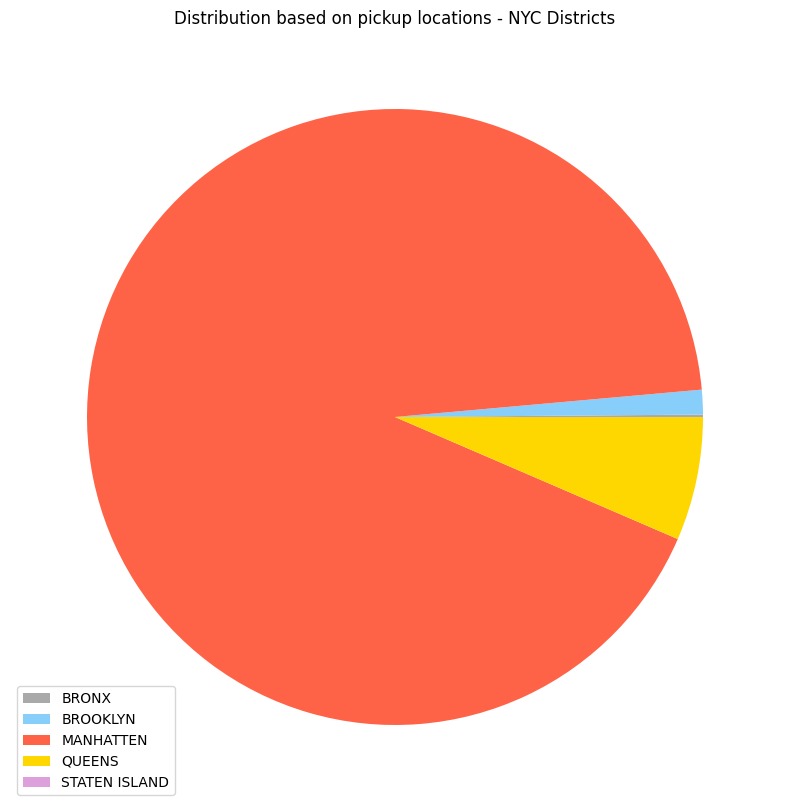

In [2]:
pu_year = []
for month in setup.year:
    pu_year.append(district_distribution(month, 'PULocationID'))
pu_distribution = sum_up(pu_year)
pu_percentages = district_percentages(pu_distribution)
show_result(pu_percentages, pu_year, 'pickup')

## DOLocationID
#### Calculate distribution based on the customer dropoffs

-------------------- YEAR AVERAGE --------------------
[0.6626106431602716, 4.341048724694455, 90.03880555689592, 4.935182325786184, 0.022352749463173064] 


-------------------- JANUARY --------------------
[0.5937842483843058, 4.168754229109357, 90.68911779738194, 4.529689036542202, 0.018654688582193248] 

-------------------- FEBRUARY --------------------
[0.5743068208273026, 4.089433379648464, 90.80086879188471, 4.517843313574276, 0.01754769406524677] 

-------------------- MARCH --------------------
[0.6483127802843209, 4.293415309548251, 90.15802930341093, 4.880343951576672, 0.019898655179831238] 

-------------------- APRIL --------------------
[0.6575227507725148, 4.349345885645973, 90.1328348176221, 4.841059510607174, 0.019237035352244018] 

-------------------- MAY --------------------
[0.683491394953648, 4.448553961405126, 89.74610716952223, 5.101307295185033, 0.020540178933952494] 

-------------------- JUNE --------------------
[0.6780116130713004, 4.498508976908586, 89.61

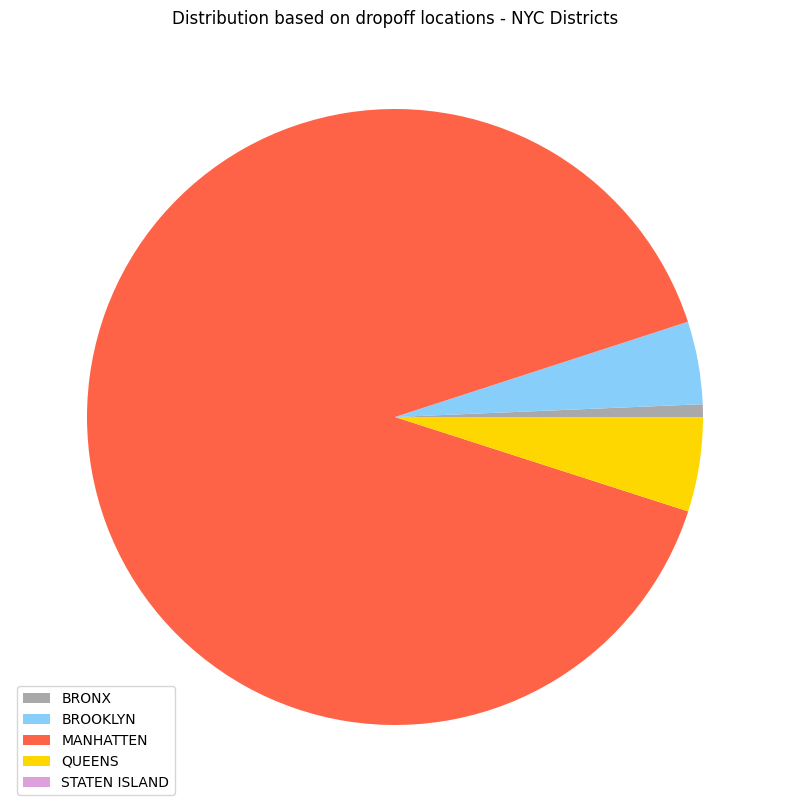

In [3]:
do_year = []
for month in setup.year:
    do_year.append(district_distribution(month, 'DOLocationID'))
do_distribution = sum_up(do_year)
do_percentages = district_percentages(do_distribution)
show_result(do_percentages, do_year, 'dropoff')